# Check what the signal looks like

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import signals and labels

In [2]:
s101 = pd.read_csv('emg.csv', header = None)
label = pd.read_csv('grasp.csv', header = None)

In [3]:
s101.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.004000e-07,1.496400e-06,-0.000014,0.000006,-0.000005,9.756200e-07,5.053400e-07,1.868200e-08,-0.000002,0.000031,8.900800e-07,6.521500e-06
1,1.707100e-07,3.342700e-06,-0.000014,0.000003,-0.000008,1.143500e-06,2.687500e-06,1.871000e-08,-0.000002,0.000023,2.568800e-06,4.795300e-06
2,8.418200e-07,4.014000e-06,-0.000013,-0.000003,-0.000008,3.829100e-06,2.519900e-06,1.873700e-08,-0.000003,0.000012,-1.165600e-07,1.684000e-06
3,1.177200e-06,3.211200e-07,-0.000009,-0.000003,-0.000005,4.500500e-06,5.059100e-07,-1.490900e-07,-0.000005,0.000004,-2.466200e-06,-7.056700e-07
4,3.377400e-07,-1.021800e-06,-0.000004,-0.000002,-0.000003,1.143600e-06,-1.508100e-06,1.879300e-08,-0.000004,0.000002,-3.976600e-06,-5.694100e-07


In [4]:
s101_static = s101.iloc[0:5626197]
label_static = label.iloc[0:5626197]

In [5]:
s101_static.info()
label_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626197 entries, 0 to 5626196
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
dtypes: float64(12)
memory usage: 515.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626197 entries, 0 to 5626196
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       int64
dtypes: int64(1)
memory usage: 42.9 MB


## Plot signals and labels

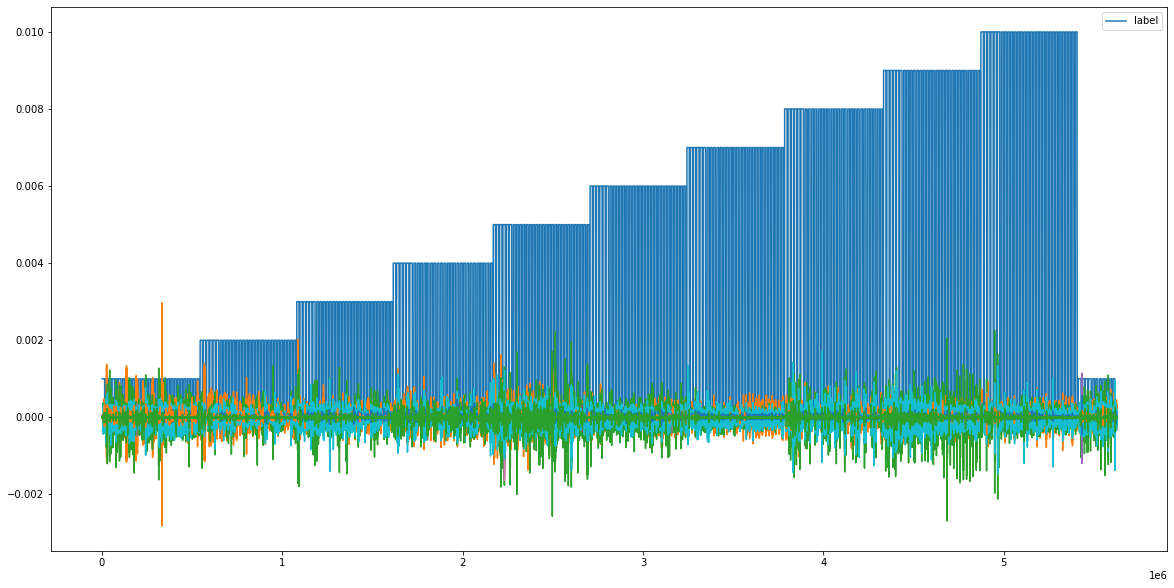

In [6]:
index = np.array(s101_static.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_static*0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_static[i])
    
line1.set_label('label')
ax.legend()
plt.show()

## Choose the first six repetition of each grasp gesture,
## Combine them to a new data frame -- s101_six

In [7]:
# find the ten start point
counter = 0
label_number = [1,2,3,4,5,6,7,8,9,10]
checked_label = []
ten_start_point = []
for i in label_number:
    for j in tqdm(range(0, len(label_static))):
        if label_static.iloc[j,0] == i:
            if i not in checked_label:
                counter += 1
                checked_label.append(i)
                ten_start_point.append(j)
        if counter == 10:
            break

In [8]:
# find the ten end point
last = 1
ten_end_point = []
for j in label_number:
    last = j
    counter = 0
    for i in tqdm(range(ten_start_point[j-1], len(label_static))):
        current = label_static.iloc[i,0]
        if last == current:
            last = current
        else:
            last = current
            counter += 1
        if counter == 12:
            ten_end_point.append(i)
            break

In [9]:
ten_start_point
ten_end_point

[0,
 543606,
 1079388,
 1614292,
 2169056,
 2705932,
 3243044,
 3784796,
 4333412,
 4873330]

[113567,
 654659,
 1189933,
 1729119,
 2280509,
 2816999,
 3354936,
 3898316,
 4445138,
 4986012]

In [10]:
a = 0
for i in range(0,10):
    a += ten_end_point[i] - ten_start_point[i] + 1
    
a

1122342

In [11]:
# get new signals
s101_six = s101_static.iloc[ten_start_point[0]:ten_end_point[0] + 1,:]
for i in range(1,10):
    s101_six = s101_six.append(s101_static.iloc[ten_start_point[i]:ten_end_point[i] + 1,:])
s101_six

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.004000e-07,1.496400e-06,-0.000014,6.068300e-06,-4.997000e-06,9.756200e-07,5.053400e-07,1.868200e-08,-0.000002,0.000031,8.900800e-07,6.521500e-06
1,1.707100e-07,3.342700e-06,-0.000014,2.711200e-06,-7.682700e-06,1.143500e-06,2.687500e-06,1.871000e-08,-0.000002,0.000023,2.568800e-06,4.795300e-06
2,8.418200e-07,4.014000e-06,-0.000013,-3.163600e-06,-7.515000e-06,3.829100e-06,2.519900e-06,1.873700e-08,-0.000003,0.000012,-1.165600e-07,1.684000e-06
3,1.177200e-06,3.211200e-07,-0.000009,-3.499500e-06,-4.997400e-06,4.500500e-06,5.059100e-07,-1.490900e-07,-0.000005,0.000004,-2.466200e-06,-7.056700e-07
4,3.377400e-07,-1.021800e-06,-0.000004,-1.821100e-06,-2.983300e-06,1.143600e-06,-1.508100e-06,1.879300e-08,-0.000004,0.000002,-3.976600e-06,-5.694100e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
4986008,8.696400e-07,2.388700e-06,-0.000002,7.216200e-07,-1.714400e-06,6.914400e-07,-4.990300e-07,-2.107100e-09,-0.000004,0.000004,3.102700e-06,1.701400e-06
4986009,1.205400e-06,3.060000e-06,-0.000004,1.393000e-06,-3.628300e-08,-1.476900e-07,-1.170400e-06,-2.118900e-09,-0.000005,0.000002,3.606400e-06,1.197900e-06
4986010,4.058900e-06,5.074100e-06,-0.000005,2.735900e-06,2.990400e-07,-1.826100e-06,-1.506100e-06,-1.699800e-07,-0.000003,0.000004,4.445700e-06,2.372800e-06
4986011,3.891100e-06,6.248900e-06,-0.000004,3.239500e-06,-2.048400e-07,-2.497500e-06,3.402700e-07,-2.142500e-09,-0.000002,0.000004,5.117200e-06,5.058500e-06


In [12]:
# get new labels
label_six = label_static.iloc[ten_start_point[0]:ten_end_point[0] + 1,:]
for i in range(1,10):
    label_six = label_six.append(label_static.iloc[ten_start_point[i]:ten_end_point[i] + 1,:])
label_six

,0
0,1
1,1
2,1
3,1
4,1
...,...
4986008,0
4986009,0
4986010,0
4986011,0


## Plot the new signals and labels

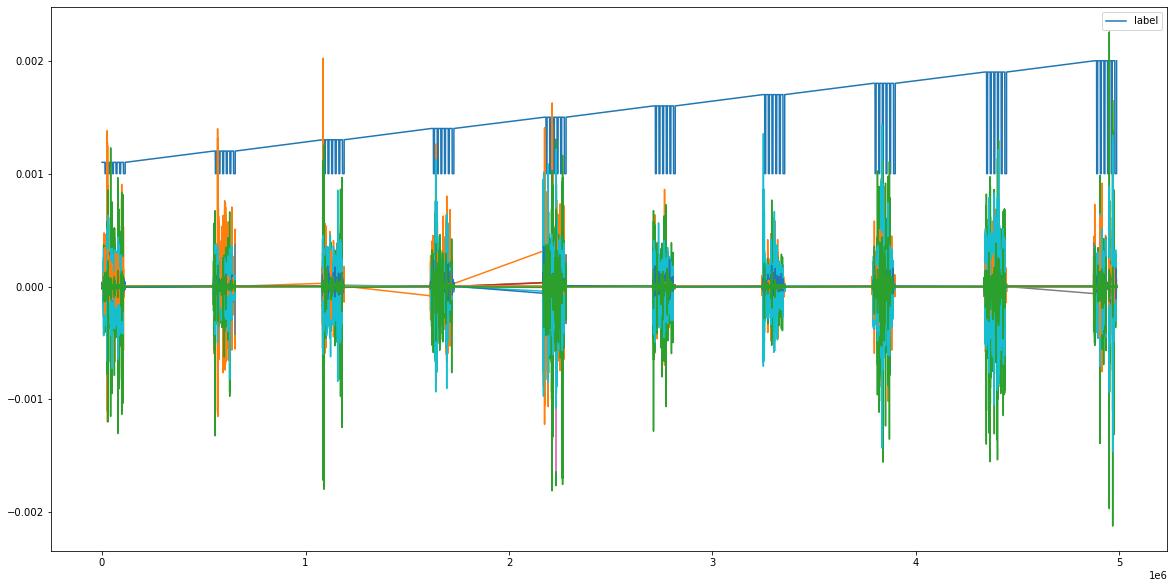

In [13]:
index = np.array(s101_six.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six[i])
    
line1.set_label('label')
ax.legend()
plt.show()

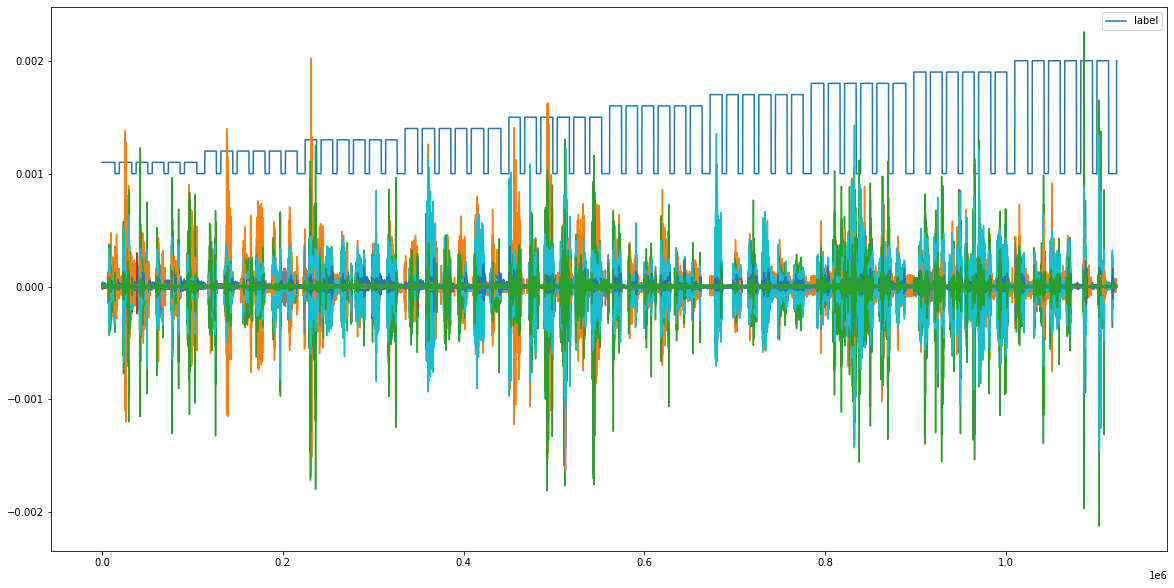

In [15]:
s101_six = s101_six.reset_index(drop = True)
label_six = label_six.reset_index(drop= True)

index = np.array(s101_six.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The first six repetition

In [16]:
# get the first gesture of new signals
s101_six_first = s101_static.iloc[ten_start_point[0]:ten_end_point[0] + 1,:]

In [17]:
# get the first gesture of new labels
label_six_first = label_static.iloc[ten_start_point[0]:ten_end_point[0] + 1,:]

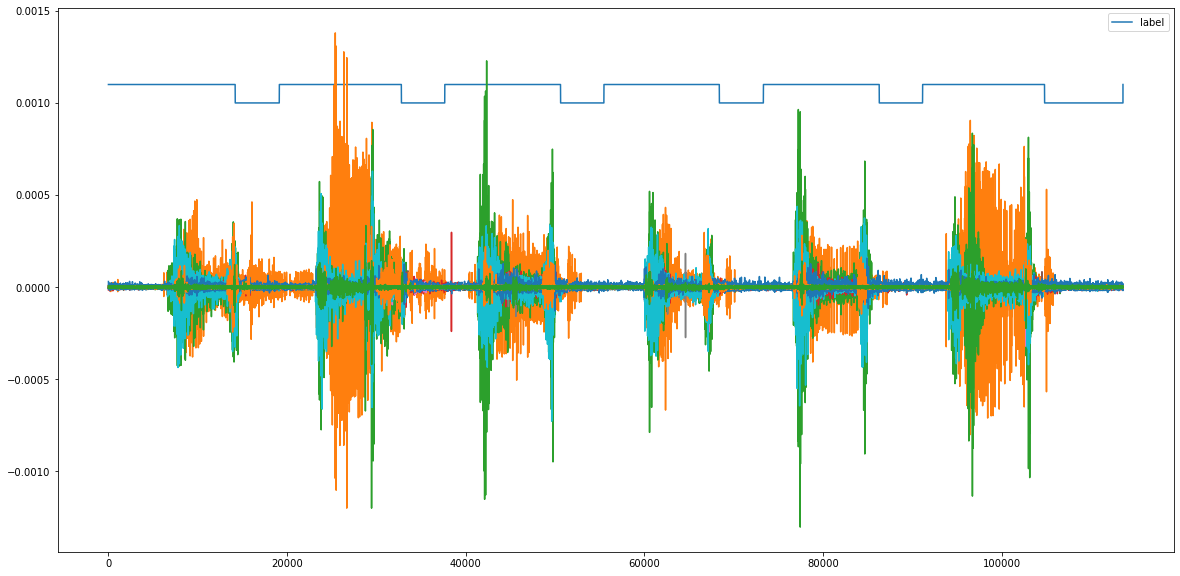

In [20]:
s101_six_first = s101_six_first.reset_index(drop = True)
label_six_first = label_six_first.reset_index(drop= True)

index = np.array(s101_six_first.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_first*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_first[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The second six repetition

In [21]:
# get the second gesture of new signals
s101_six_second = s101_static.iloc[ten_start_point[1]:ten_end_point[1] + 1,:]

In [22]:
# get the second gesture of new labels
label_six_second = label_static.iloc[ten_start_point[1]:ten_end_point[1] + 1,:]

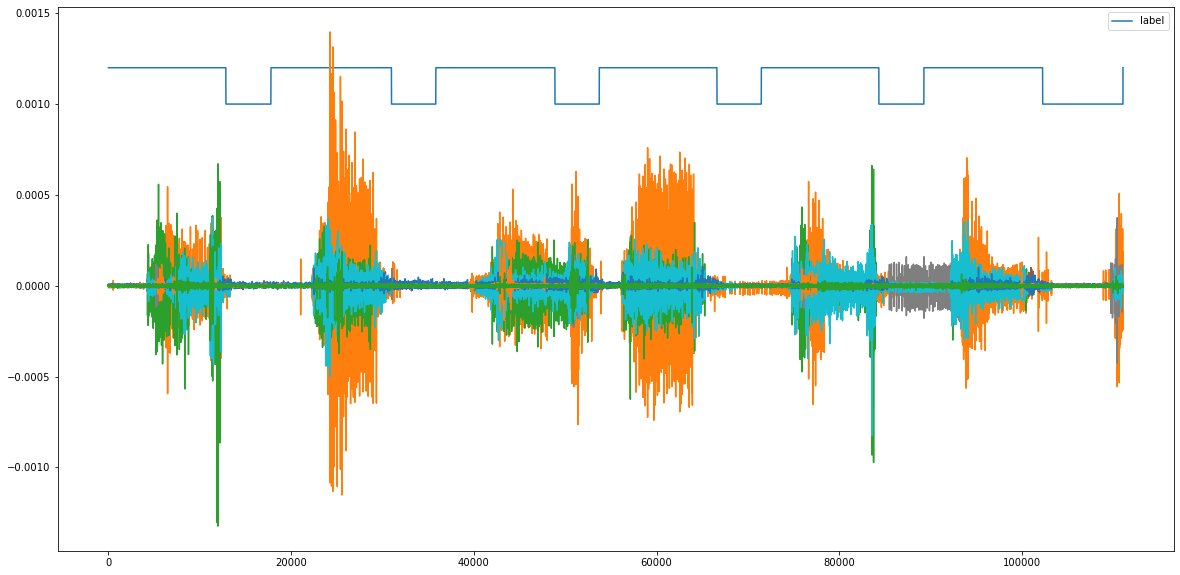

In [23]:
s101_six_second = s101_six_second.reset_index(drop = True)
label_six_second = label_six_second.reset_index(drop= True)

index = np.array(s101_six_second.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_second*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_second[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The third six repetition

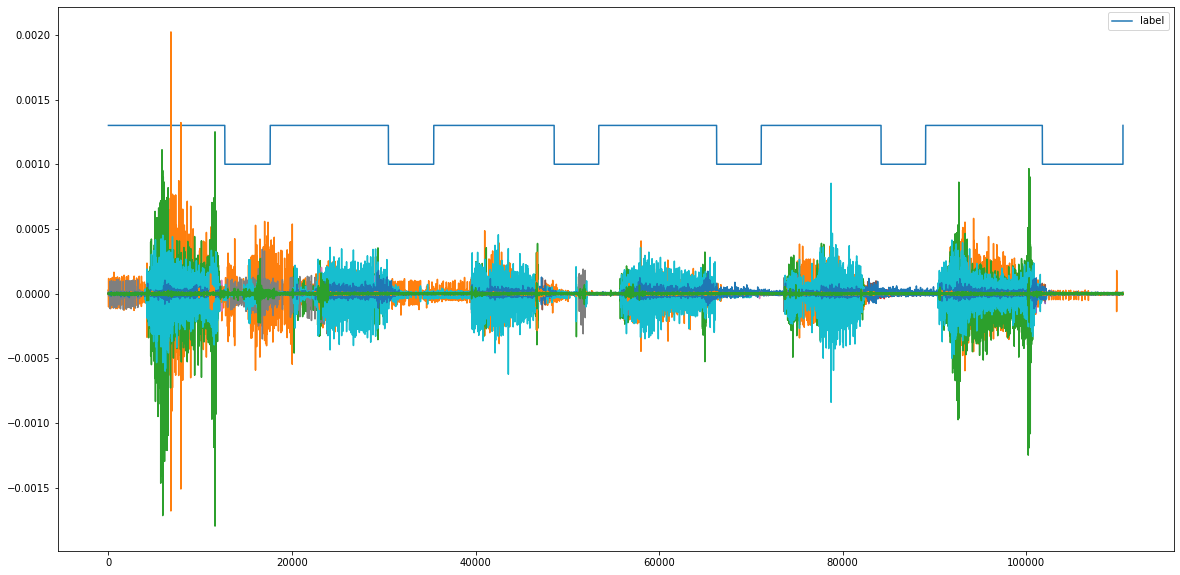

In [26]:
# get the third gesture of new signals
s101_six_third = s101_static.iloc[ten_start_point[2]:ten_end_point[2] + 1,:]

# get the third gesture of new labels
label_six_third = label_static.iloc[ten_start_point[2]:ten_end_point[2] + 1,:]

s101_six_third = s101_six_third.reset_index(drop = True)
label_six_third = label_six_third.reset_index(drop= True)

index = np.array(s101_six_third.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_third*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_third[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The fourth six repetition

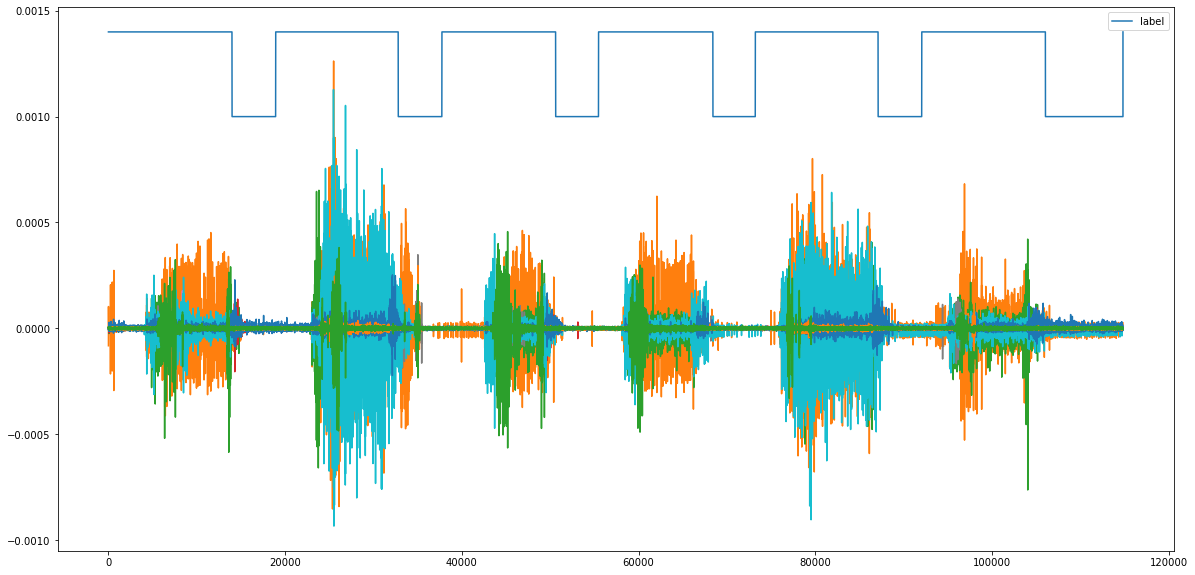

In [27]:
# get the fourth gesture of new signals
s101_six_fourth = s101_static.iloc[ten_start_point[3]:ten_end_point[3] + 1,:]

# get the fourth gesture of new labels
label_six_fourth = label_static.iloc[ten_start_point[3]:ten_end_point[3] + 1,:]

s101_six_fourth = s101_six_fourth.reset_index(drop = True)
label_six_fourth = label_six_fourth.reset_index(drop= True)

index = np.array(s101_six_fourth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_fourth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_fourth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The fifth six repetition

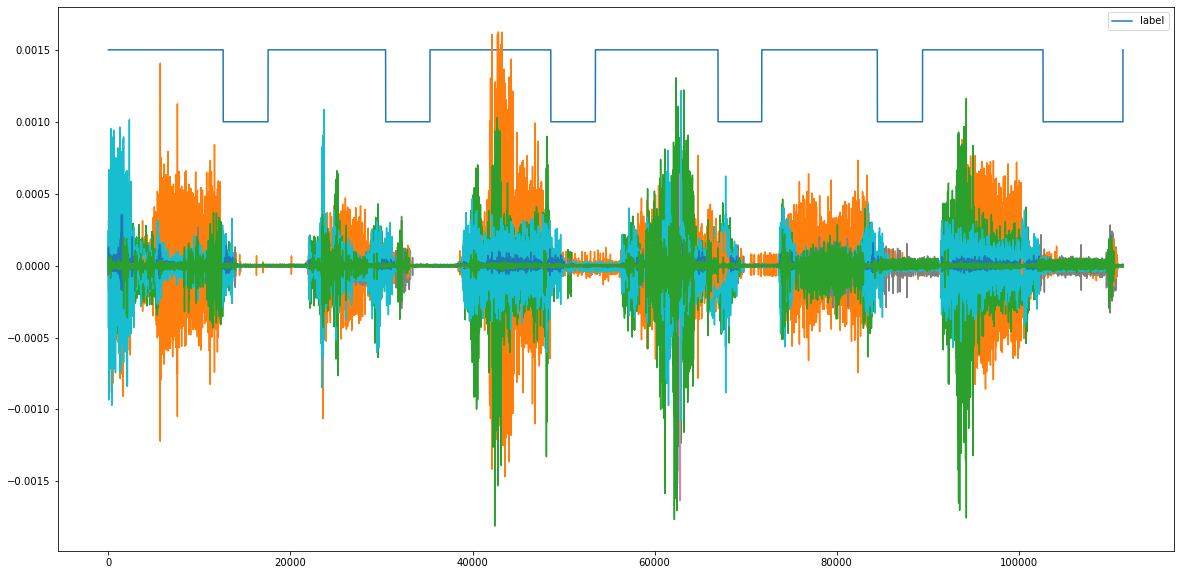

In [28]:
# get the fifth gesture of new signals
s101_six_fifth = s101_static.iloc[ten_start_point[4]:ten_end_point[4] + 1,:]

# get the fifth gesture of new labels
label_six_fifth = label_static.iloc[ten_start_point[4]:ten_end_point[4] + 1,:]

s101_six_fifth = s101_six_fifth.reset_index(drop = True)
label_six_fifth = label_six_fifth.reset_index(drop= True)

index = np.array(s101_six_fifth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_fifth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_fifth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The sixth six repetition

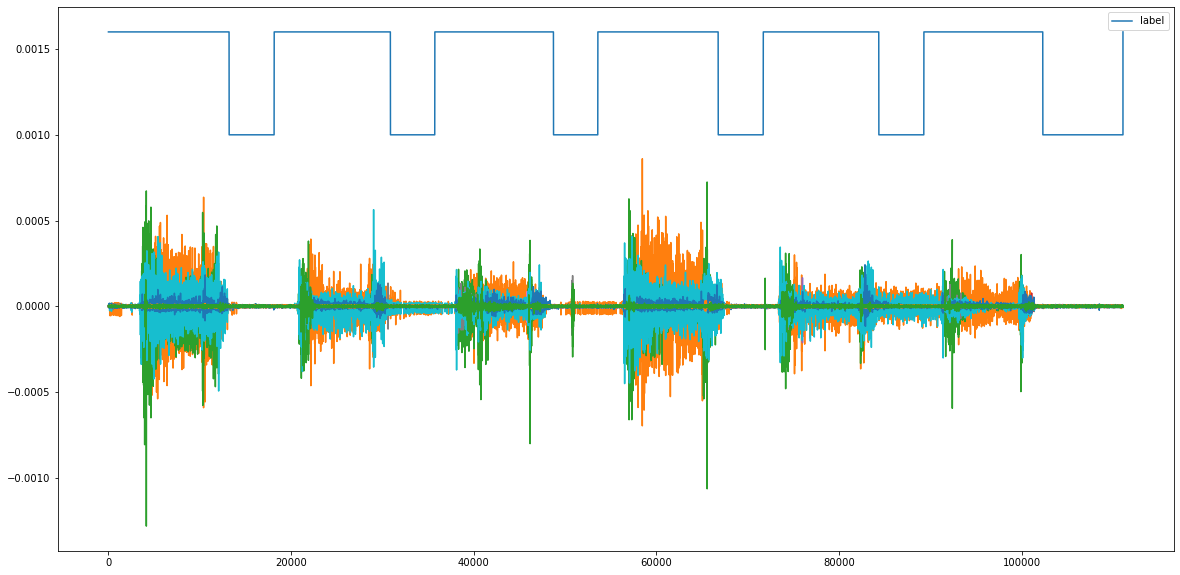

In [29]:
# get the sixth gesture of new signals
s101_six_sixth = s101_static.iloc[ten_start_point[5]:ten_end_point[5] + 1,:]

# get the sixth gesture of new labels
label_six_sixth = label_static.iloc[ten_start_point[5]:ten_end_point[5] + 1,:]

s101_six_sixth = s101_six_sixth.reset_index(drop = True)
label_six_sixth = label_six_sixth.reset_index(drop= True)

index = np.array(s101_six_sixth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_sixth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_sixth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The seventh six repetition

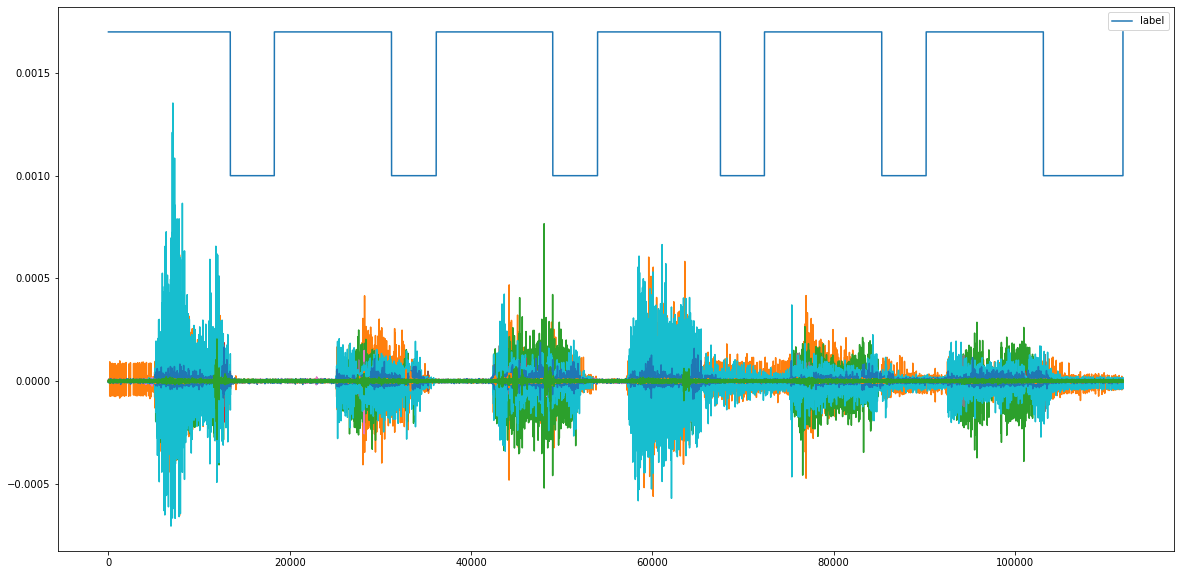

In [30]:
# get the seventh gesture of new signals
s101_six_seventh = s101_static.iloc[ten_start_point[6]:ten_end_point[6] + 1,:]

# get the seventh gesture of new labels
label_six_seventh = label_static.iloc[ten_start_point[6]:ten_end_point[6] + 1,:]

s101_six_seventh = s101_six_seventh.reset_index(drop = True)
label_six_seventh = label_six_seventh.reset_index(drop= True)

index = np.array(s101_six_seventh.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_seventh*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_seventh[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The eighth six repetition

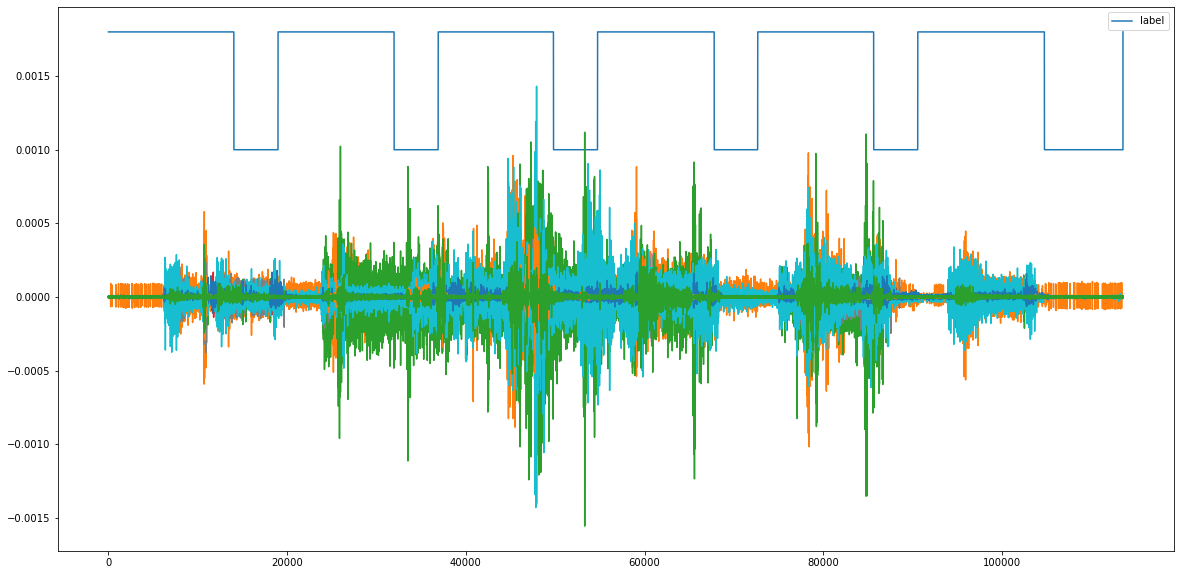

In [31]:
# get the eighth gesture of new signals
s101_six_eighth = s101_static.iloc[ten_start_point[7]:ten_end_point[7] + 1,:]

# get the eighth gesture of new labels
label_six_eighth = label_static.iloc[ten_start_point[7]:ten_end_point[7] + 1,:]

s101_six_eighth = s101_six_eighth.reset_index(drop = True)
label_six_eighth = label_six_eighth.reset_index(drop= True)

index = np.array(s101_six_eighth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_eighth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_eighth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The nineth six repetition

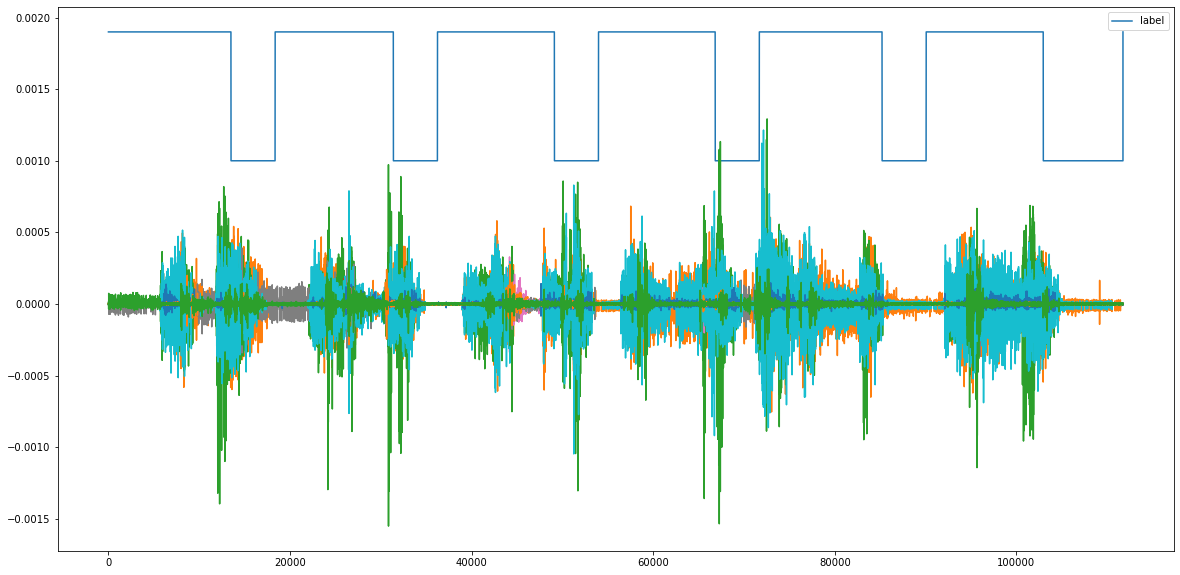

In [32]:
# get the nineth gesture of new signals
s101_six_nineth = s101_static.iloc[ten_start_point[8]:ten_end_point[8] + 1,:]

# get the nineth gesture of new labels
label_six_nineth = label_static.iloc[ten_start_point[8]:ten_end_point[8] + 1,:]

s101_six_nineth = s101_six_nineth.reset_index(drop = True)
label_six_nineth = label_six_nineth.reset_index(drop= True)

index = np.array(s101_six_nineth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_nineth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_nineth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### The tenth six repetition

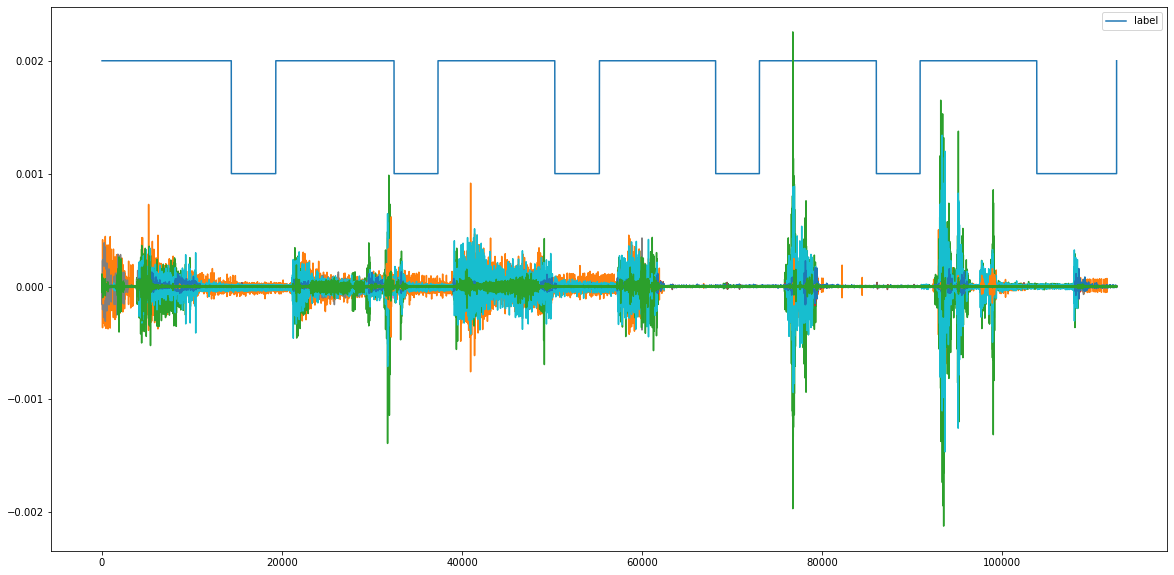

In [33]:
# get the tenth gesture of new signals
s101_six_tenth = s101_static.iloc[ten_start_point[9]:ten_end_point[9] + 1,:]

# get the tenth gesture of new labels
label_six_tenth = label_static.iloc[ten_start_point[9]:ten_end_point[9] + 1,:]

s101_six_tenth = s101_six_tenth.reset_index(drop = True)
label_six_tenth = label_six_tenth.reset_index(drop= True)

index = np.array(s101_six_tenth.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(label_six_tenth*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, s101_six_tenth[i])
    
line1.set_label('label')
ax.legend()
plt.show()

### find the first five repetition as the training set, and the last repetition as the testing set

In [89]:
# for this time, find the new ten start point and ten end point
# find the ten new start point of the 5 repetition
# ten_start_point2 is for the test data set #1
counter = 0
label_number = [1,2,3,4,5,6,7,8,9,10]
checked_label = []
ten_start_point2 = []
for i in label_number:
    for j in tqdm(range(0, len(label_six))):
        if label_six.iloc[j,0] == i:
            if i not in checked_label:
                counter += 1
                checked_label.append(i)
                ten_start_point2.append(j)
        if counter == 10:
            break

In [90]:
# find the ten new end point of the 5 repetition
last = 1
ten_end_point2 = []
label_number = [1,2,3,4,5,6,7,8,9,10]
for j in label_number:
    last = j
    counter = 0
    for i in tqdm(range(ten_start_point2[j-1], len(label_six))):
        current = label_six.iloc[i,0]
        if last == current:
            last = current
        else:
            last = current
            counter += 1
        if counter == 10:
            ten_end_point2.append(i)
            break

In [91]:
ten_start_point2
ten_end_point2

[0, 113568, 224622, 335168, 449996, 561450, 672518, 784411, 897932, 1009659]

[91132,
 202825,
 313659,
 427214,
 539425,
 650713,
 762698,
 874963,
 987978,
 1100509]

In [92]:
# get trainx (signal)
trainx = s101_six.iloc[ten_start_point2[0]:ten_end_point2[0] + 1,:]
for i in range(1,10):
    trainx = trainx.append(s101_six.iloc[ten_start_point2[i]:ten_end_point2[i] + 1,:])
trainx

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.004000e-07,1.496400e-06,-1.412200e-05,6.068300e-06,-4.997000e-06,9.756200e-07,5.053400e-07,1.868200e-08,-1.901900e-06,3.091300e-05,8.900800e-07,6.521500e-06
1,1.707100e-07,3.342700e-06,-1.378700e-05,2.711200e-06,-7.682700e-06,1.143500e-06,2.687500e-06,1.871000e-08,-1.566300e-06,2.272300e-05,2.568800e-06,4.795300e-06
2,8.418200e-07,4.014000e-06,-1.261200e-05,-3.163600e-06,-7.515000e-06,3.829100e-06,2.519900e-06,1.873700e-08,-3.077100e-06,1.186600e-05,-1.165600e-07,1.684000e-06
3,1.177200e-06,3.211200e-07,-8.583100e-06,-3.499500e-06,-4.997400e-06,4.500500e-06,5.059100e-07,-1.490900e-07,-4.755600e-06,4.418400e-06,-2.466200e-06,-7.056700e-07
4,3.377400e-07,-1.021800e-06,-4.219000e-06,-1.821100e-06,-2.983300e-06,1.143600e-06,-1.508100e-06,1.879300e-08,-3.748700e-06,1.543100e-06,-3.976600e-06,-5.694100e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1100505,3.694100e-06,2.118400e-07,-8.078700e-07,3.107600e-06,2.934600e-07,-4.524300e-06,-2.713400e-06,5.828300e-08,2.014700e-06,-8.647500e-07,2.124100e-06,1.868400e-06
1100506,3.358400e-06,-1.802400e-06,-1.479200e-06,2.268300e-06,-1.385100e-06,-1.838500e-06,-4.056200e-06,2.261200e-07,1.683000e-07,-2.543300e-06,1.956300e-06,3.149500e-06
1100507,2.855000e-06,-2.473800e-06,-3.041500e-07,1.932600e-06,-2.560100e-06,1.758200e-07,-2.881400e-06,-1.095800e-07,-5.031600e-07,-3.382700e-06,2.124100e-06,2.103800e-06
1100508,6.729100e-07,-1.131100e-06,8.708800e-07,9.254700e-07,-1.217400e-06,8.473800e-07,-2.789500e-08,-1.095900e-07,6.716800e-07,-8.650300e-07,3.299100e-06,1.873700e-06


In [93]:
# get trainy (label)
trainy = label_six.iloc[ten_start_point2[0]:ten_end_point2[0] + 1,:]
for i in range(1,10):
    trainy = trainy.append(label_six.iloc[ten_start_point2[i]:ten_end_point2[i] + 1,:])
trainy

,0
0,1
1,1
2,1
3,1
4,1
...,...
1100505,0
1100506,0
1100507,0
1100508,0


### plot training set

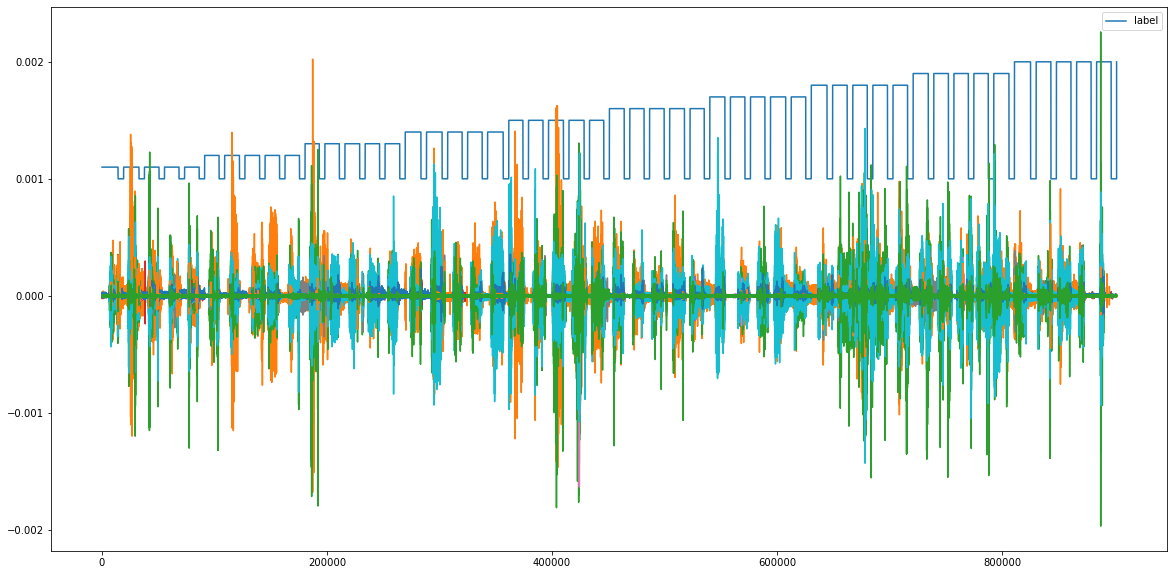

In [94]:
trainx = trainx.reset_index(drop = True)
trainy = trainy.reset_index(drop= True)

index = np.array(trainx.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, trainx[i])
    
line1.set_label('label')
ax.legend()
plt.show()

In [96]:
ten_start_point2
ten_end_point2

[0, 113568, 224622, 335168, 449996, 561450, 672518, 784411, 897932, 1009659]

[91132,
 202825,
 313659,
 427214,
 539425,
 650713,
 762698,
 874963,
 987978,
 1100509]

### find the testing set #1

In [109]:
# get testx (signal)
testx1 = s101_six.iloc[ten_end_point2[0]:ten_start_point2[1] + 1,:]
for i in range(1,10):
    if i == 9:
        testx1 = testx1.append(s101_six.iloc[ten_end_point2[i]:1122341,:])
        break
    testx1 = testx1.append(s101_six.iloc[ten_end_point2[i]:ten_start_point2[i+1] + 1,:])
    
testx1

,0,1,2,3,4,5,6,7,8,9,10,11
91132,-5.507600e-06,4.364300e-07,-3.460300e-06,2.883100e-06,3.060400e-06,1.959900e-06,-3.986900e-06,1.589100e-08,-1.376100e-06,-8.767900e-07,0.000003,-3.083800e-06
91133,-3.325700e-06,9.397600e-07,-5.810100e-06,2.883100e-06,2.172500e-06,9.529600e-07,-3.315400e-06,1.590500e-08,-1.711700e-06,3.471300e-06,0.000003,-2.527400e-06
91134,-2.990100e-06,4.360800e-07,-5.642200e-06,1.540200e-06,1.064200e-06,3.302900e-06,-4.616900e-07,1.591800e-08,6.382000e-07,4.261500e-06,0.000004,-1.174300e-06
91135,-1.647400e-06,-2.354900e-07,-2.956600e-06,2.043600e-06,-3.057800e-07,5.652900e-06,1.888400e-06,1.593200e-08,2.316700e-06,2.362100e-06,0.000004,6.072200e-07
91136,3.666800e-07,-1.578500e-06,-7.745200e-07,3.386300e-06,-6.773800e-07,3.638800e-06,2.895700e-06,1.594500e-08,-7.045100e-07,2.104400e-06,0.000003,2.493700e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1122336,3.555200e-06,2.053100e-06,-7.881000e-07,-2.854900e-07,-1.714000e-06,8.592800e-07,-1.841900e-06,-2.095300e-09,-2.738200e-06,3.412100e-06,0.000003,-4.806700e-07
1122337,8.696400e-07,2.388700e-06,-1.795200e-06,7.216200e-07,-1.714400e-06,6.914400e-07,-4.990300e-07,-2.107100e-09,-3.913300e-06,3.747900e-06,0.000003,1.701400e-06
1122338,1.205400e-06,3.060000e-06,-4.312900e-06,1.393000e-06,-3.628300e-08,-1.476900e-07,-1.170400e-06,-2.118900e-09,-5.088300e-06,2.405200e-06,0.000004,1.197900e-06
1122339,4.058900e-06,5.074100e-06,-4.648600e-06,2.735900e-06,2.990400e-07,-1.826100e-06,-1.506100e-06,-1.699800e-07,-3.410000e-06,3.916000e-06,0.000004,2.372800e-06


In [110]:
# get testy1 (label)
testy1 = label_six.iloc[ten_end_point2[0]:ten_start_point2[1] + 1,:]
for i in range(1,10):
    if i == 9:
        testy1 = testy1.append(label_six.iloc[ten_end_point2[i]:1122341,:])
        break
    testy1 = testy1.append(label_six.iloc[ten_end_point2[i]:ten_start_point2[i+1] + 1,:])
    
testy1

,0
91132,1
91133,1
91134,1
91135,1
91136,1
...,...
1122336,0
1122337,0
1122338,0
1122339,0


### plot testing set #1

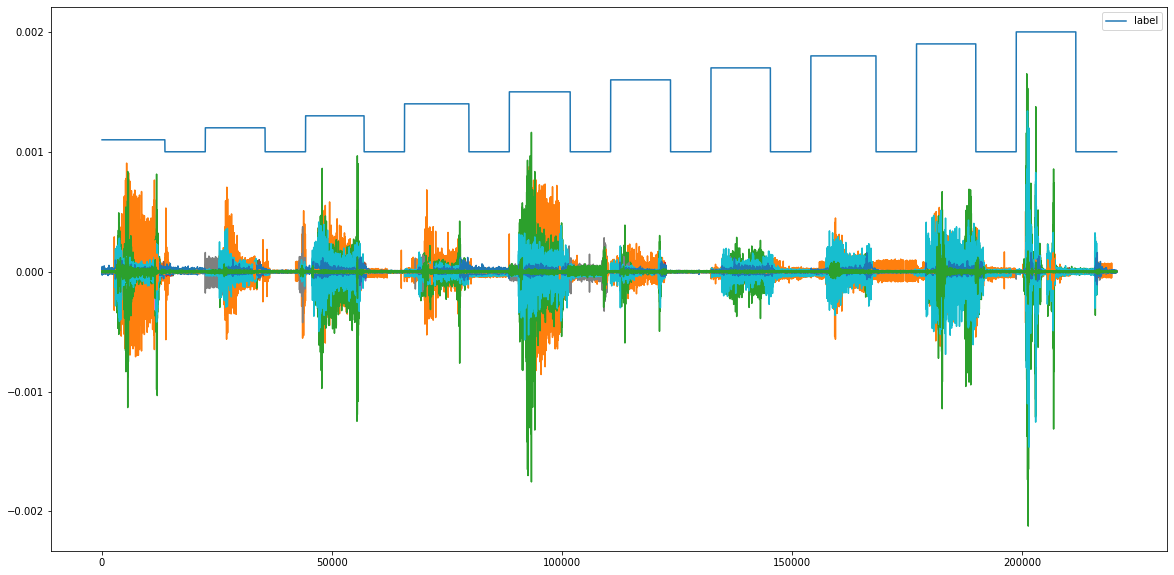

In [111]:
testx1 = testx1.reset_index(drop = True)
testy1 = testy1.reset_index(drop= True)

index = np.array(testx1.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy1*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, testx1[i])
    
line1.set_label('label')
ax.legend()
plt.show()

In [122]:
testy1

,0
0,1
1,1
2,1
3,1
4,1
...,...
220553,0
220554,0
220555,0
220556,0


### find the testing set #2

In [117]:
# find the fisrt 200ms which is 385 data point

# find the ten start point
# ten_start_point3 is for the testing data set #2

counter = 0
label_number = [1,2,3,4,5,6,7,8,9,10]
checked_label = []
ten_start_point3 = []
for i in label_number:
    for j in tqdm(range(0, len(testy1))):
        if testy1.iloc[j,0] == i:
            if i not in checked_label:
                counter += 1
                checked_label.append(i)
                ten_start_point3.append(j)
        if counter == 10:
            break

In [120]:
# find the ten new end point
# ten_start_point3 is for the testing data set #2

last = 1
ten_end_point3 = []
label_number = [1,2,3,4,5,6,7,8,9,10]
for j in label_number:
    last = j
    counter = 0
    for i in tqdm(range(ten_start_point3[j-1], len(testy1))):
        current = testy1.iloc[i,0]
        if last == current:
            last = current
        else:
            last = current
            counter += 1
        if counter == 1:
            ten_end_point3.append(i)
            break

In [121]:
ten_start_point3
ten_end_point3

[0, 22436, 44234, 65744, 88527, 110553, 132359, 154073, 177043, 198725]

[13652, 35434, 56955, 79743, 101769, 123576, 145289, 168245, 189941, 211689]

In [142]:
testx2 = testx1.iloc[ten_start_point3[0]:ten_start_point3[0]+385, :]
testx2 = testx1.iloc[ten_end_point3[0]:ten_end_point3[0]+385, :]

for i in range(1,10):
#     if i == 9:
#         testx2 = testx2.append(testx1.iloc[ten_start_point3[i]:ten_start_point3[i]+385, :])
#         testx2 = testx2.append(testx1.iloc[ten_end_point3[i]:220557, :])
#         break
    testx2 = testx2.append(testx1.iloc[ten_start_point3[i]:ten_start_point3[i]+385, :])
    testx2 = testx2.append(testx1.iloc[ten_end_point3[i]:ten_end_point3[i]+385, :])

In [143]:
testy2 = testy1.iloc[ten_start_point3[0]:ten_start_point3[0]+385, :]
testy2 = testy1.iloc[ten_end_point3[0]:ten_end_point3[0]+385, :]

for i in range(1,10):
#     if i == 9:
#         testy2 = testy2.append(testy1.iloc[ten_start_point3[i]:ten_start_point3[i]+385, :])
#         testy2 = testy2.append(testy1.iloc[ten_end_point3[i]:220557, :])
#         break
    testy2 = testy2.append(testy1.iloc[ten_start_point3[i]:ten_start_point3[i]+385, :])
    testy2 = testy2.append(testy1.iloc[ten_end_point3[i]:ten_end_point3[i]+385, :])

### plot testing set #2

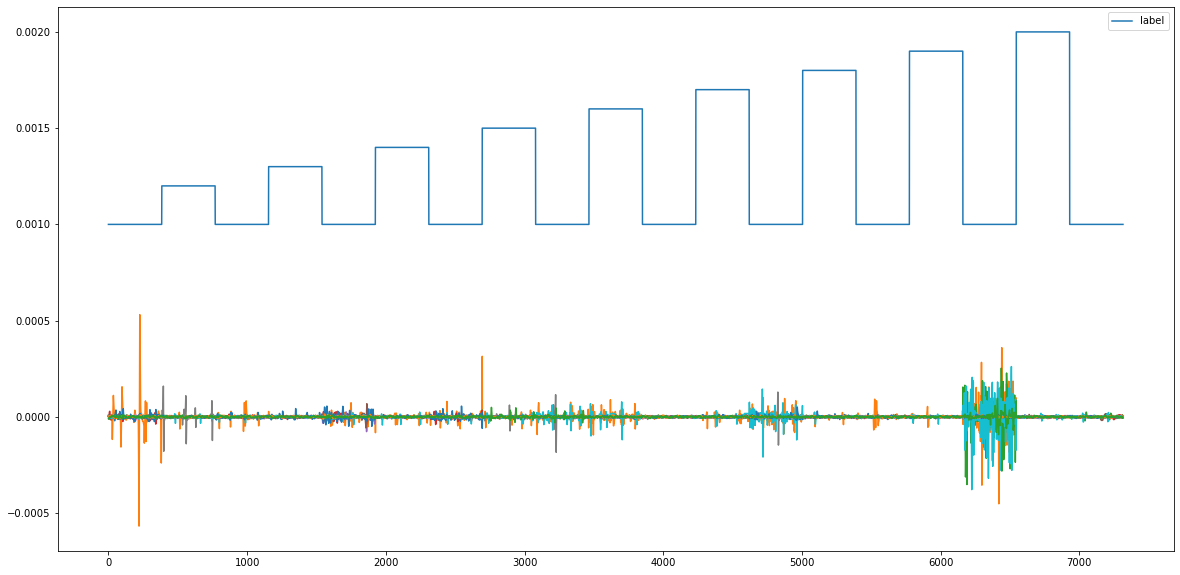

In [144]:
testx2 = testx2.reset_index(drop = True)
testy2 = testy2.reset_index(drop= True)

index = np.array(testx2.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(testy2*0.0001+0.001)
for i in tqdm(range(0,12)):
    ax.plot(index, testx2[i])
    
line1.set_label('label')
ax.legend()
plt.show()

## build the model